In [1]:
import os
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## Photoelectric

phot_filepath = '/Users/carmenromoluque/machine-learning-course/data_phot_images/'
phot_list     = []
for filename in os.listdir(phot_filepath):
    if filename.endswith('590_10_2.npz'):
        my_file = phot_filepath+filename
        d = np.load(my_file, allow_pickle=True)
        for i in d['phot_images'][0]:
            #print(i)
            phot_list.append(i.reshape(20,20))
phot_images = np.array(phot_list)

In [5]:
phot_images.shape

(1, 20, 20)

In [133]:
## Compton

compt_filepath = '/Users/carmenromoluque/machine-learning-course/data_compt_images/'
compt_list     = []
for filename in os.listdir(compt_filepath):
    if filename.endswith('.npz'):
        my_file = compt_filepath+filename
        d = np.load(my_file, allow_pickle=True)
        for im in d['compt_images']:
            compt_list.append(im)
compt_images = np.array(compt_list)

In [134]:
len(compt_images)

23423

In [9]:
## Compton 2 (energy as the phot)

compt_filepath = '/Users/carmenromoluque/machine-learning-course/data_compt_images/'
compt_list2    = []
for filename in os.listdir(compt_filepath):
    if filename.endswith('.npz'):
        my_file = compt_filepath+filename
        d = np.load(my_file, allow_pickle=True)
        for im in d['compt_images']:
            compt_list2.append(im)
compt_images2 = np.array(compt_list2)

In [10]:
len(compt_images2)

42832

### Store images in the same file

In [135]:
evt_file = '/Users/carmenromoluque/machine-learning-course/full_body_4cmdepth_all_images.npz'
np.savez(evt_file, phot_images=phot_images, compt_images=compt_images)

In [11]:
## Compton 2:

evt_file = '/Users/carmenromoluque/machine-learning-course/full_body_4cmdepth_all_images_correct_compton.npz'
np.savez(evt_file, phot_images=phot_images, compt_images=compt_images2[:25000])

### How to load the data:

In [6]:
phot_list, compt_list = [], []
data_file  = '/Users/carmenromoluque/machine-learning-course/full_body_4cmdepth_all_images.npz'
data       = np.load(data_file, allow_pickle=True)
for im in data['phot_images']:
    if len(im)==0:
        continue
    phot_list .append(im.reshape(400)) #For the CNN we transform the matriz in a 1D array
for im in data['compt_images']:
    if len(im)==0:
        continue
    compt_list.append(im.reshape(400))
compt_images = np.array(compt_list)
phot_images  = np.array(phot_list)

In [7]:
phot_images.shape

(19932, 400)

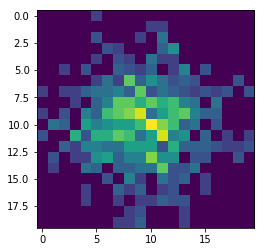

In [13]:
plt.imshow(compt_images2[0][0]);